<a href="https://colab.research.google.com/github/luizfeit/Algoritmo-SMA/blob/main/swarm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

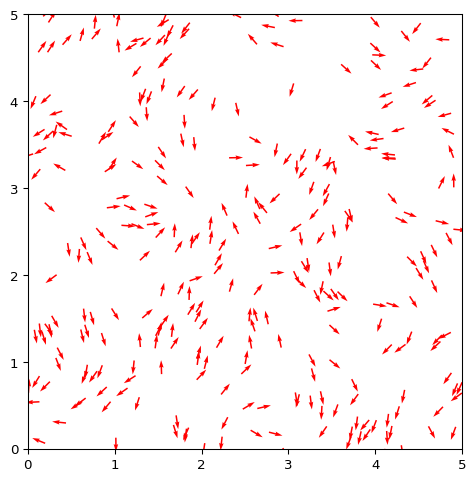

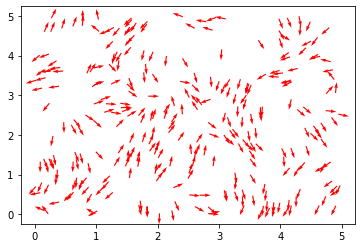

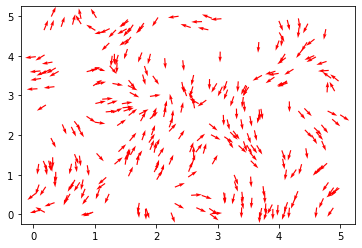

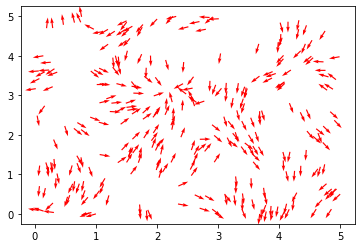

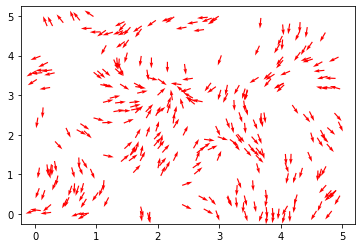

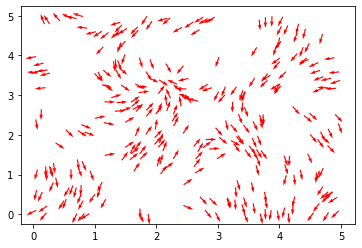

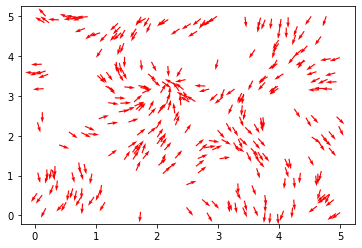

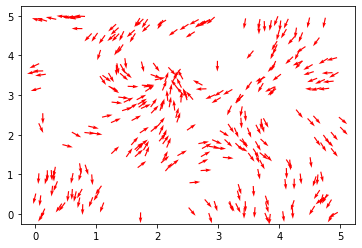

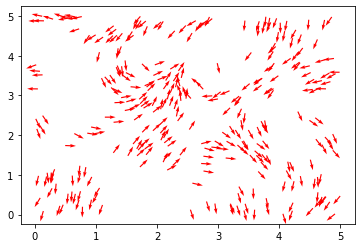

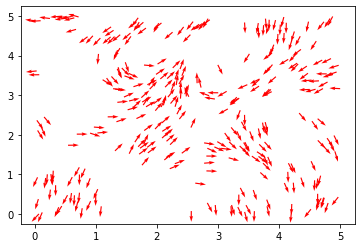

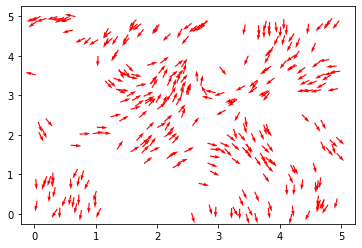

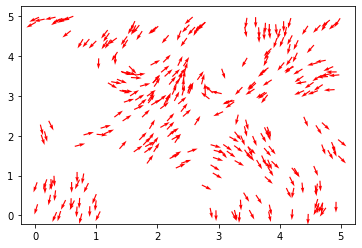

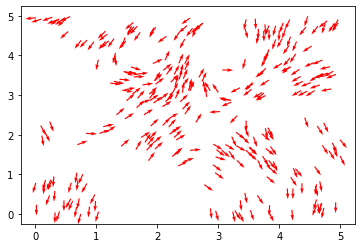

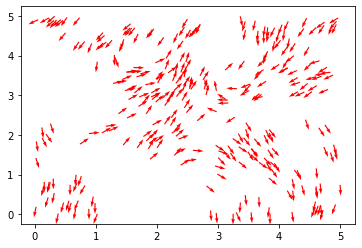

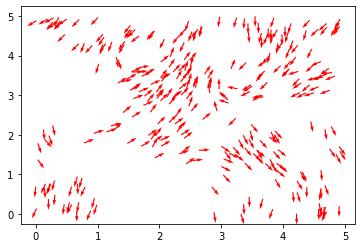

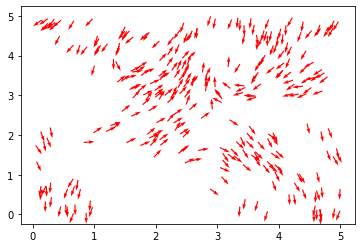

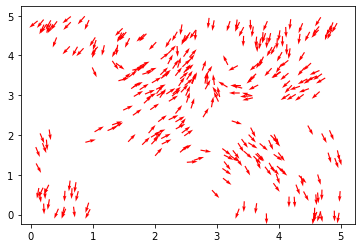

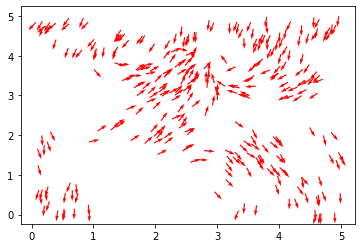

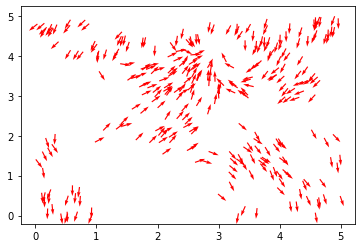

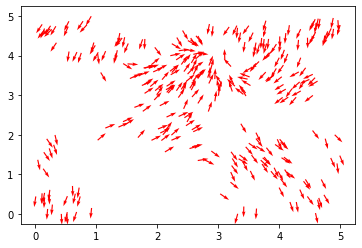

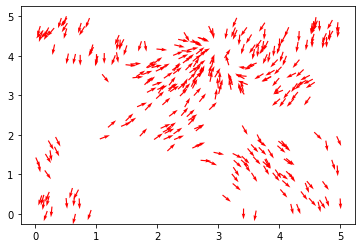

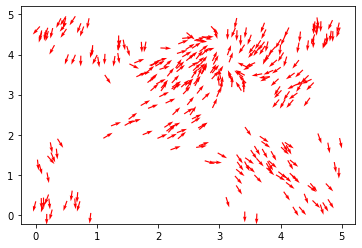

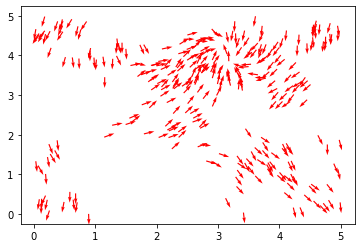

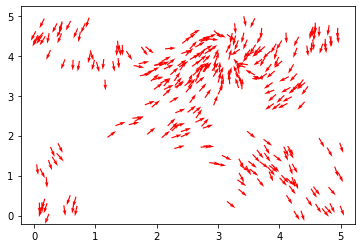

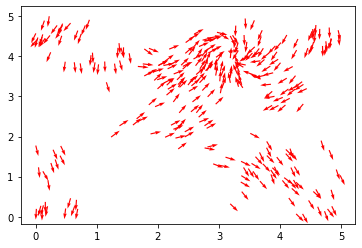

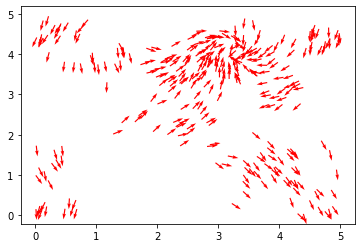

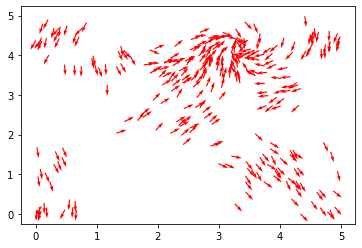

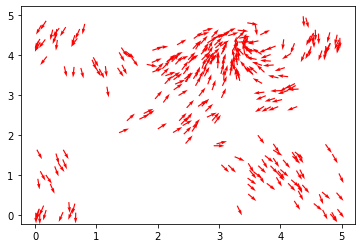

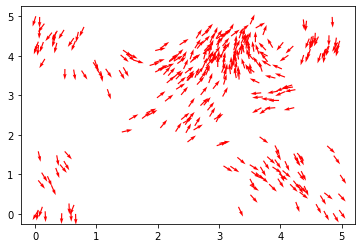

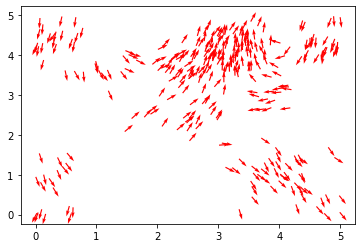

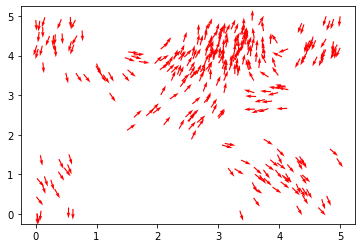

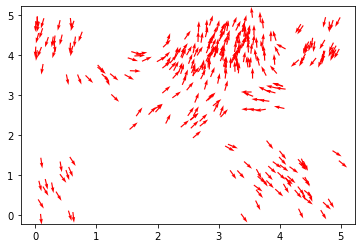

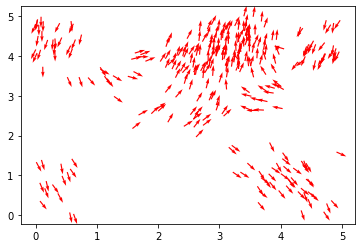

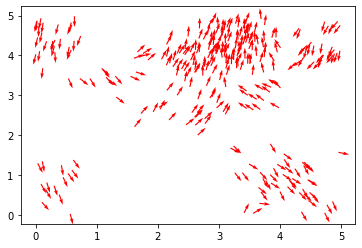

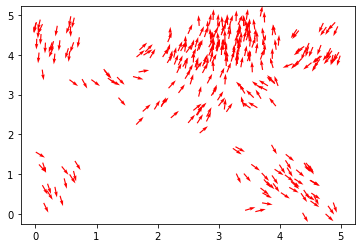

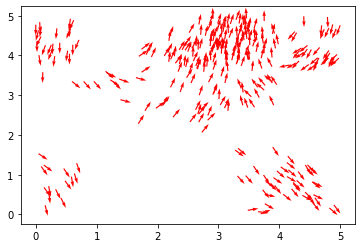

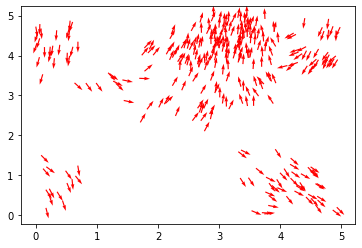

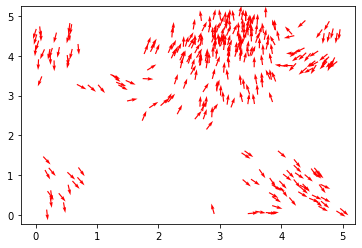

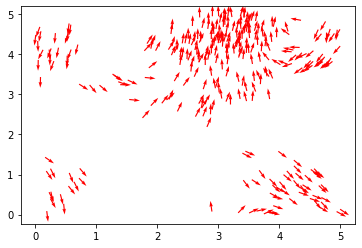

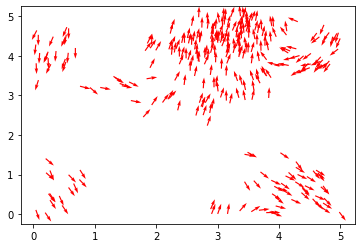

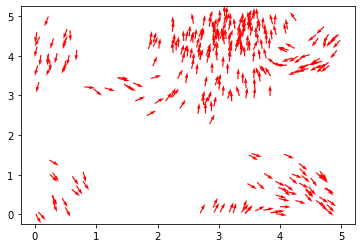

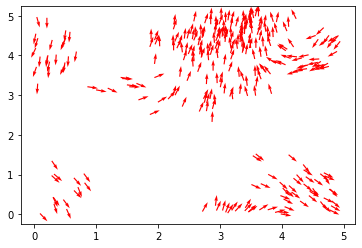

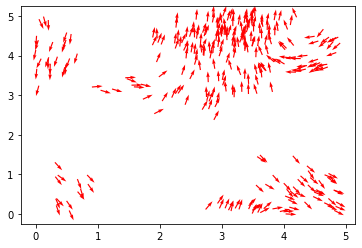

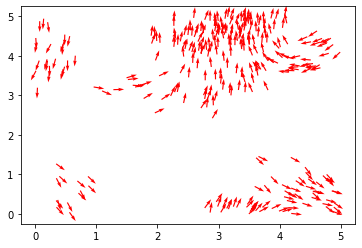

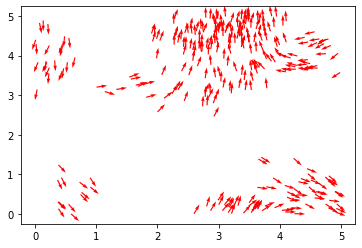

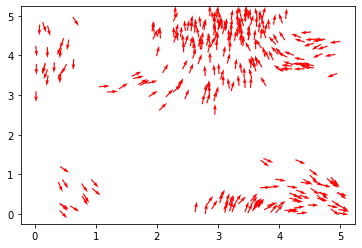

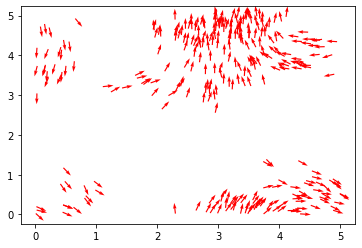

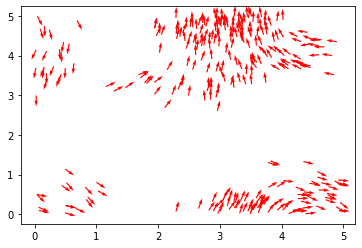

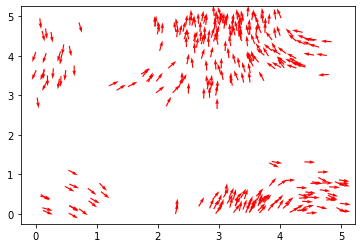

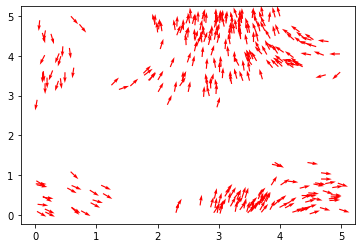

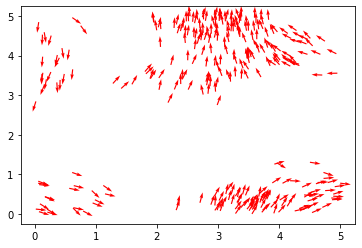

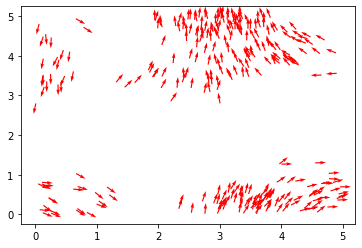

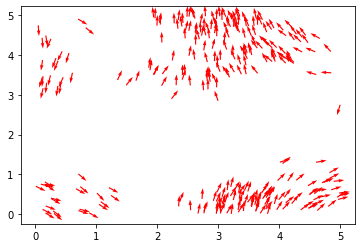

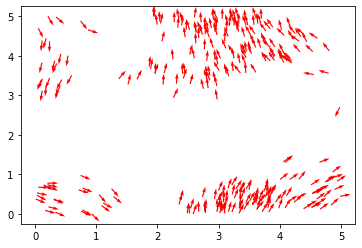

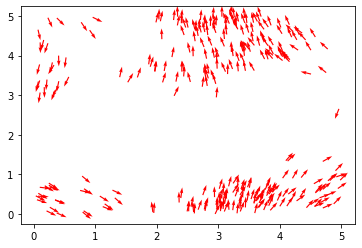

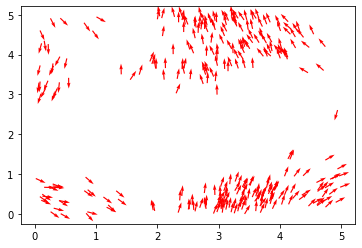

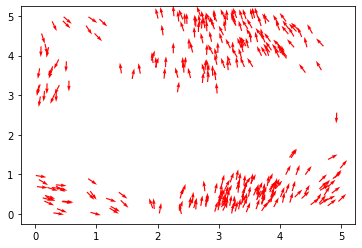

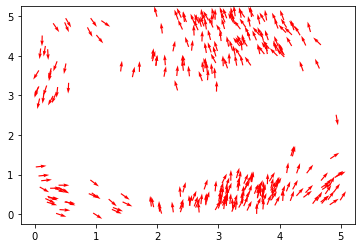

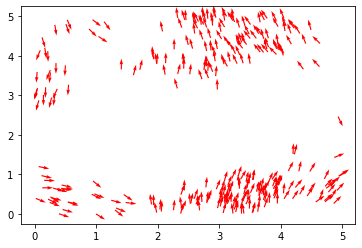

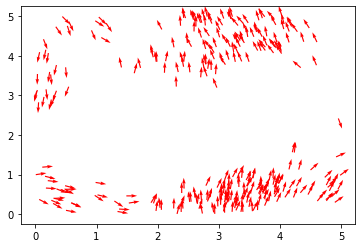

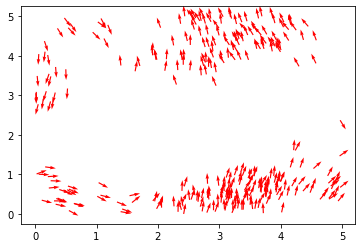

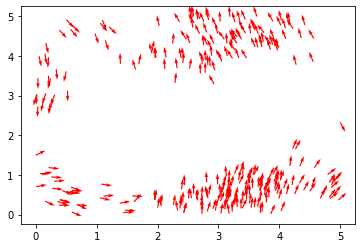

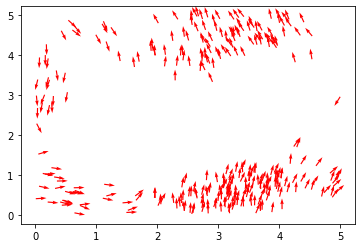

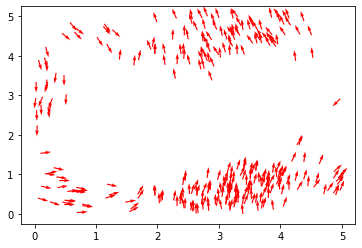

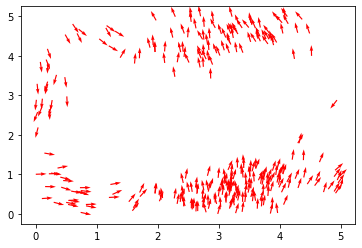

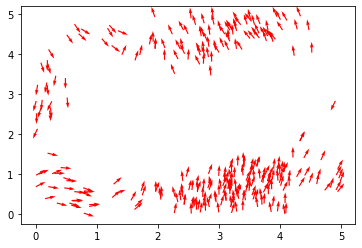

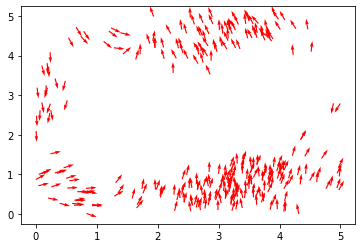

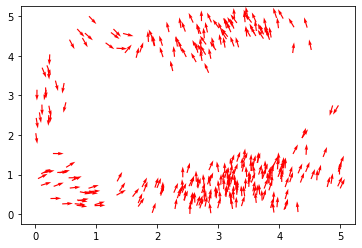

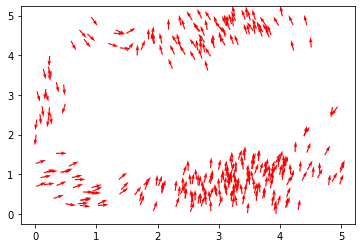

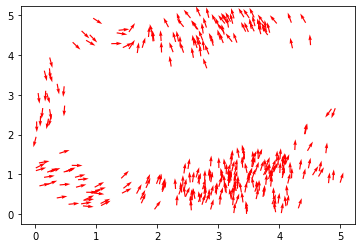

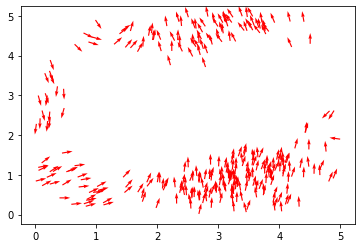

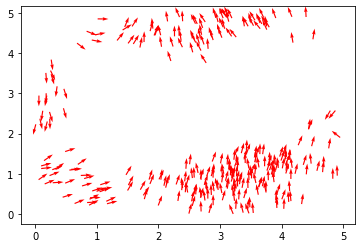

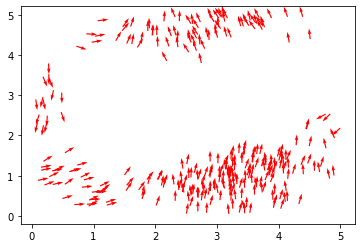

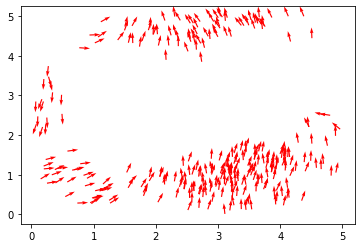

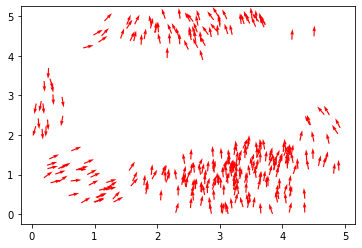

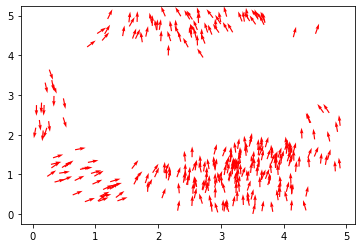

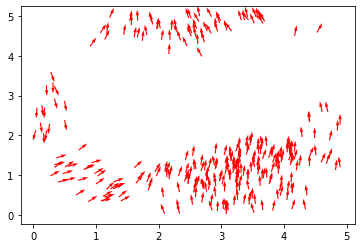

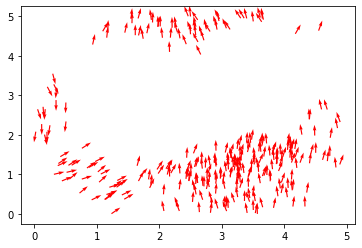

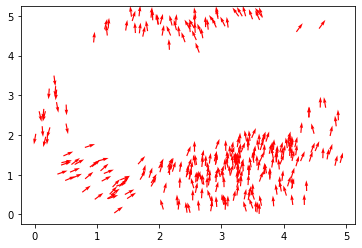

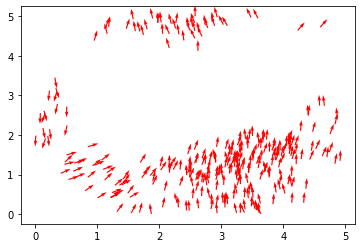

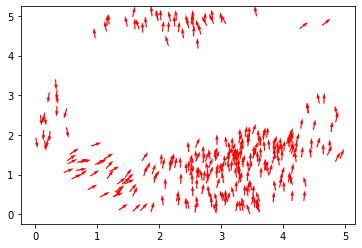

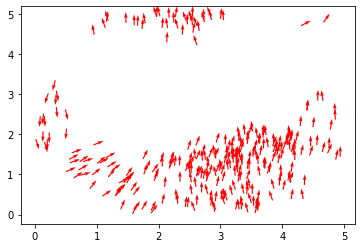

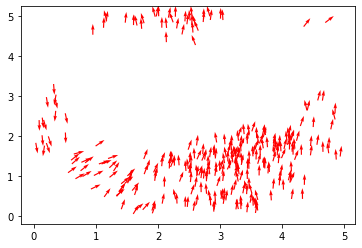

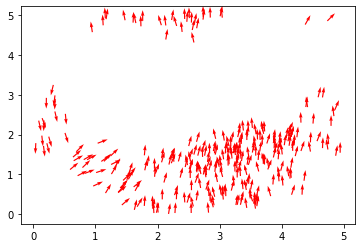

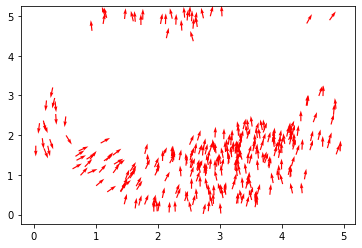

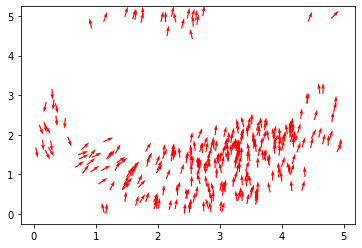

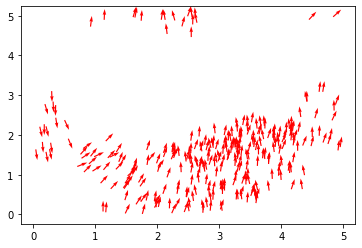

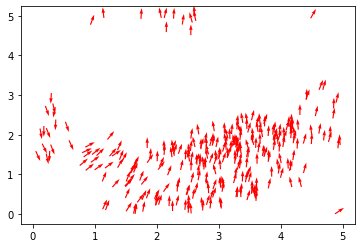

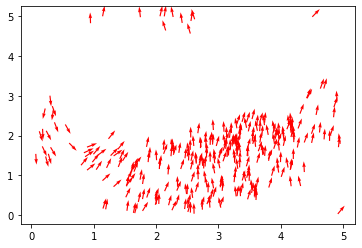

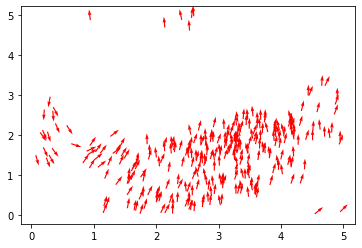

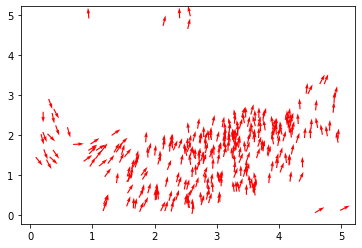

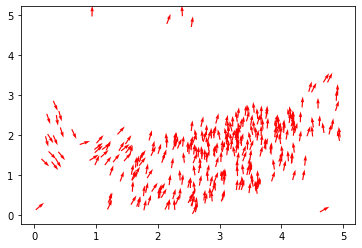

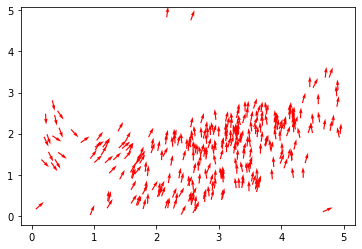

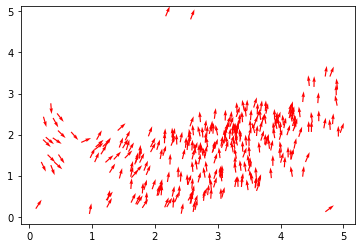

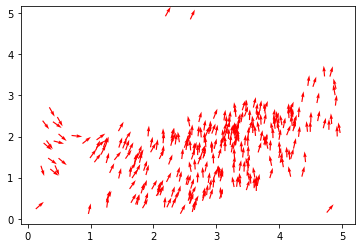

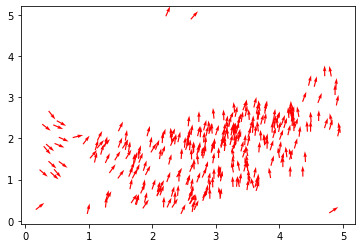

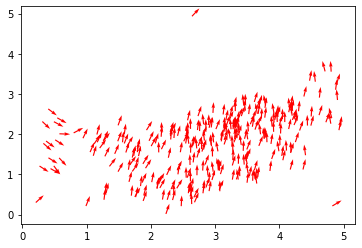

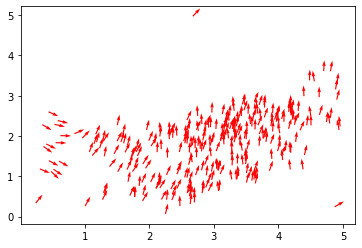

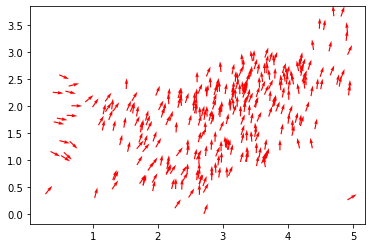

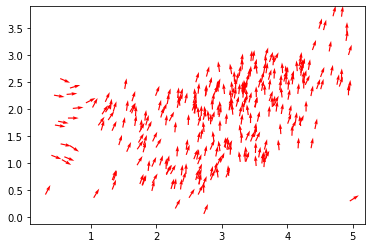

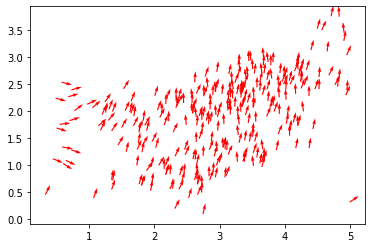

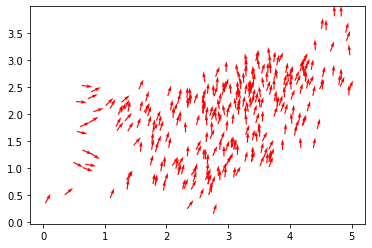

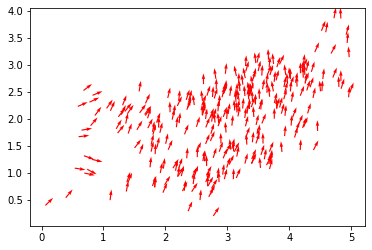

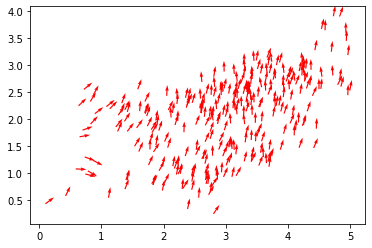

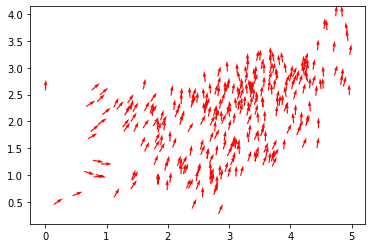

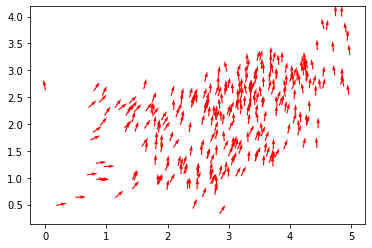

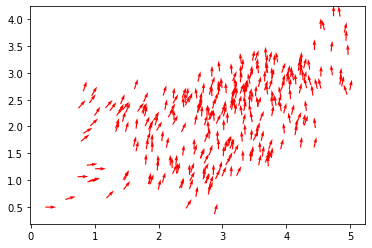

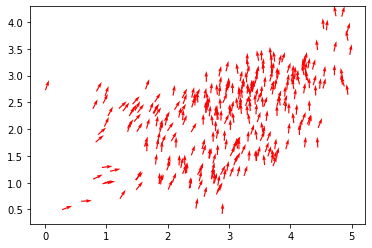

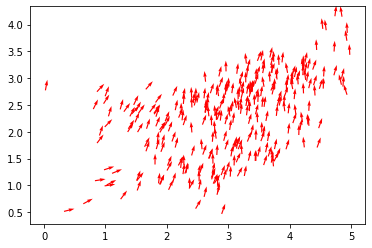

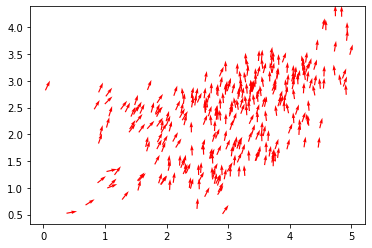

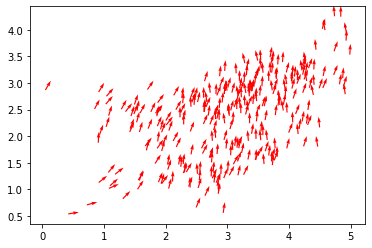

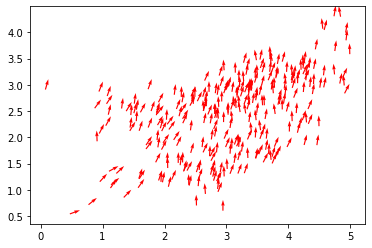

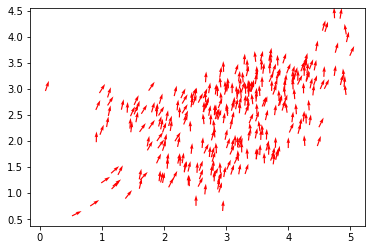

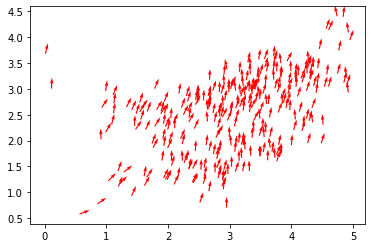

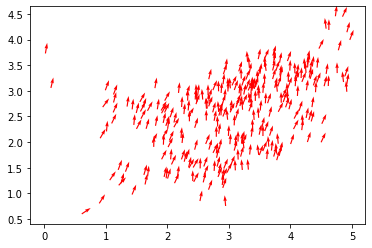

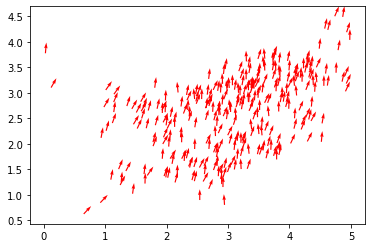

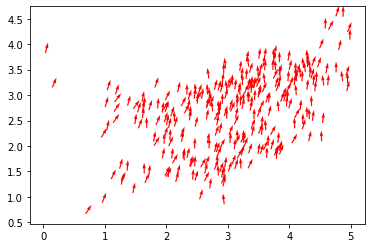

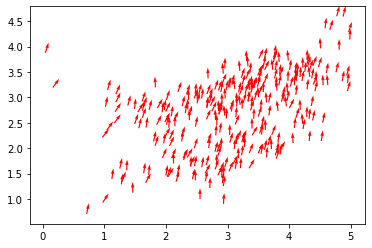

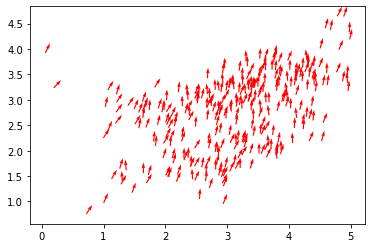

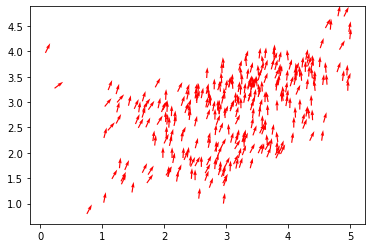

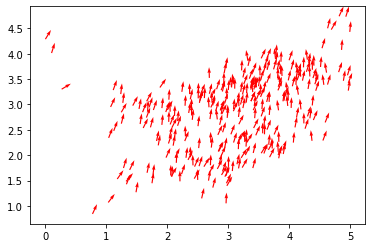

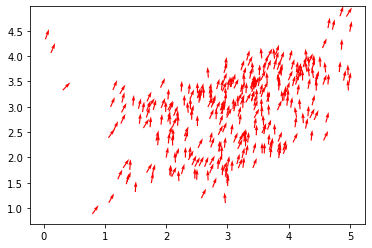

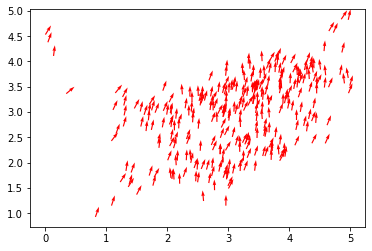

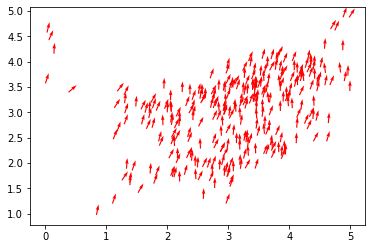

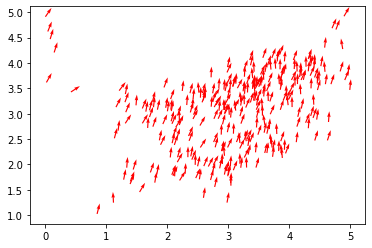

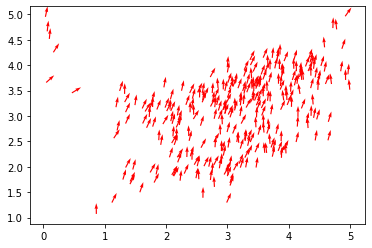

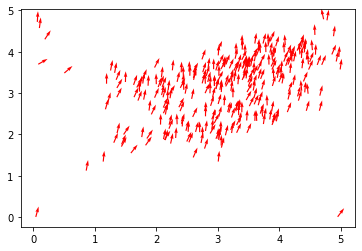

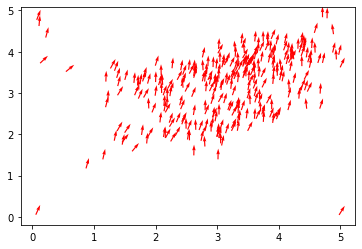

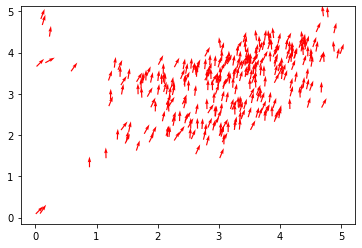

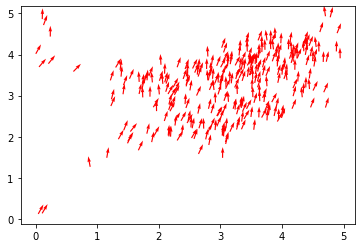

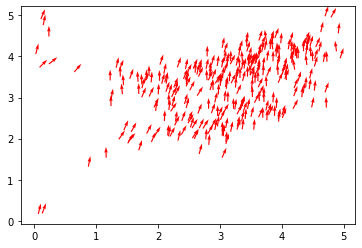

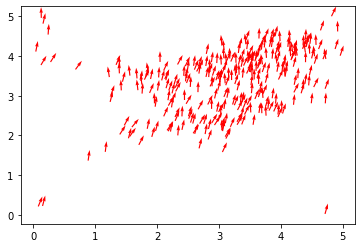

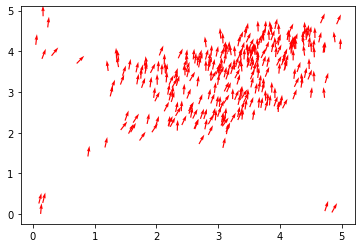

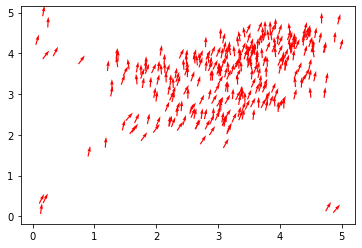

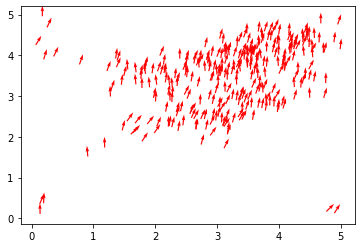

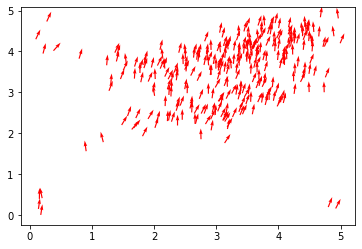

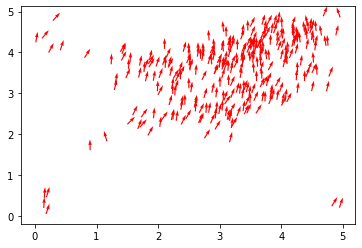

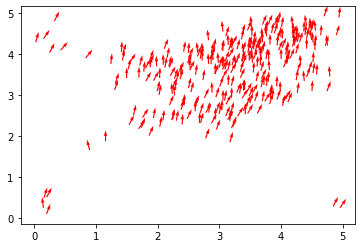

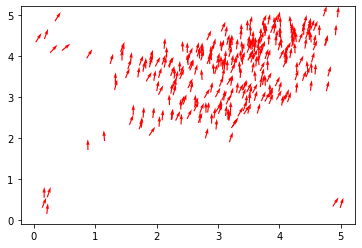

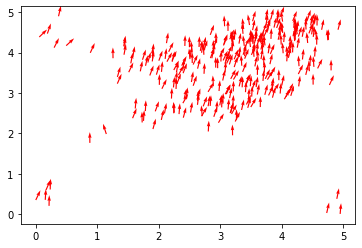

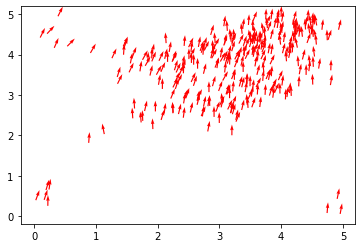

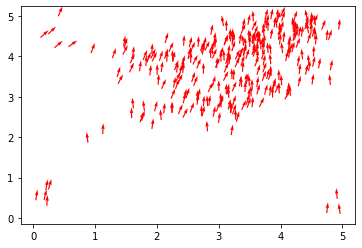

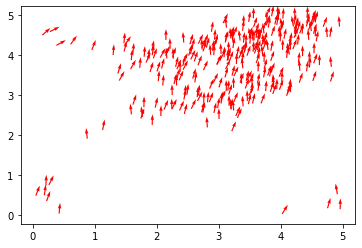

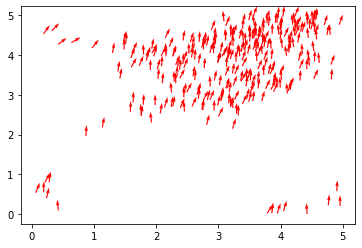

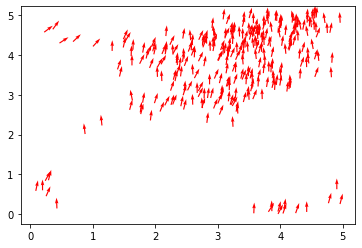

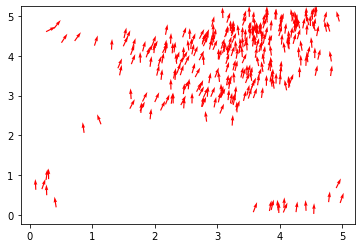

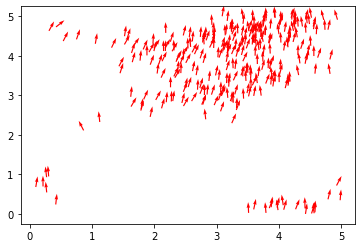

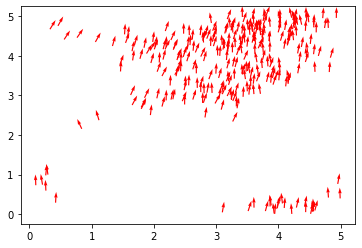

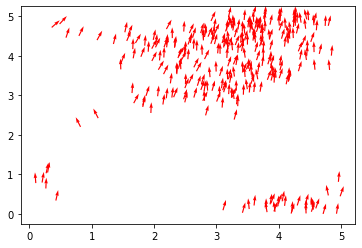

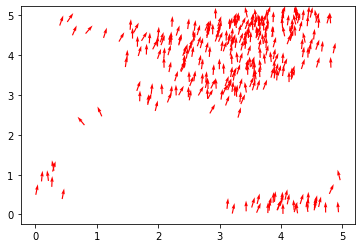

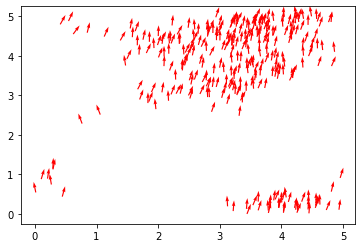

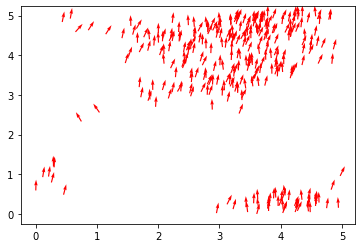

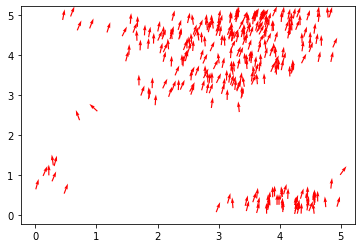

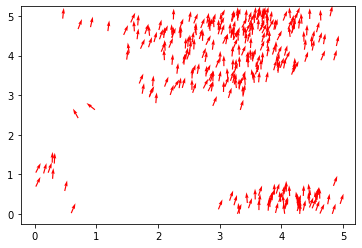

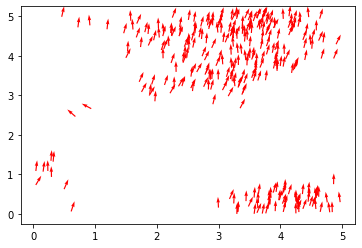

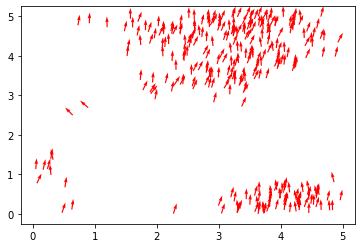

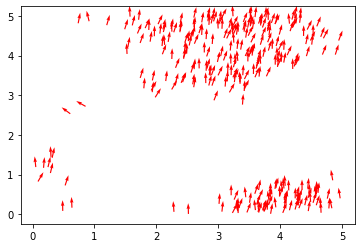

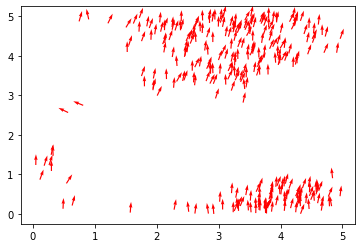

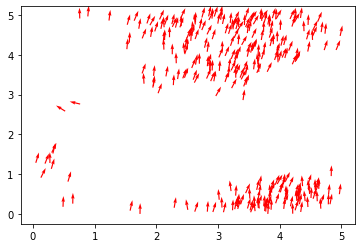

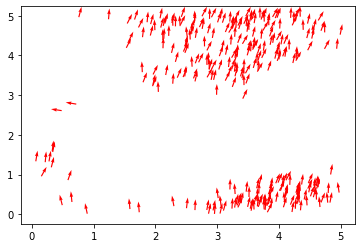

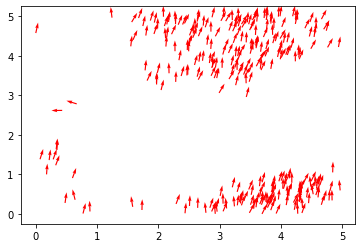

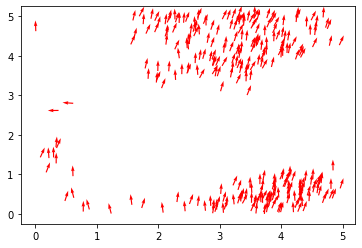

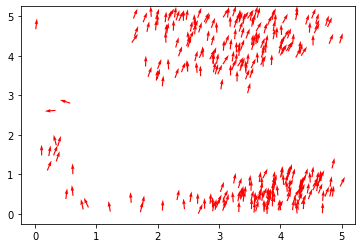

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os as os
import imageio as image

	
# Simulation parameters
v0           = 0.5      # velocity
eta          = 0.6      # random fluctuation in angle (in radians)
L            = 5        # size of box
R            = 0.5      # interaction radius
dt           = 0.1      # time step
Nt           = 200      # number of time steps
N            = 300      # number of birds
plotRealTime = True
listaImagens = []
images = []

# Initialize
np.random.seed(30)      # set the random number generator seed

# bird positions
x = np.random.rand(N,1)*L
y = np.random.rand(N,1)*L

# bird velocities
theta = 2 * np.pi * np.random.rand(N,1)
vx = v0 * np.cos(theta)
vy = v0 * np.sin(theta)

# Prep figure
fig = plt.figure(figsize=(6,6), dpi=96)
ax = plt.gca()

# Simulation Main Loop
for i in range(Nt):

	# move
	x += vx*dt
	y += vy*dt
	
	# apply periodic BCs
	x = x % L
	y = y % L
	
	# find mean angle of neighbors within R
	mean_theta = theta
	for b in range(N):
		neighbors = (x-x[b])**2+(y-y[b])**2 < R**2
		sx = np.sum(np.cos(theta[neighbors]))
		sy = np.sum(np.sin(theta[neighbors]))
		mean_theta[b] = np.arctan2(sy, sx)
		
	# add random perturbations
	theta = mean_theta + eta*(np.random.rand(N,1)-0.5)
	
	# update velocities
	vx = v0 * np.cos(theta)
	vy = v0 * np.sin(theta)
	
	# plot in real time
	if plotRealTime or (i == Nt-1):
		plt.cla()
		plt.quiver(x,y,vx,vy,color='r')
		ax.set(xlim=(0, L), ylim=(0, L))
		ax.set_aspect('equal')	
		plt.savefig('activematter{0}.png'.format(i))
		listaImagens.append('activematter{0}.png'.format(i))
		plt.pause(0.001)
	
	listaImagens.sort()
 
for filename in listaImagens:
	  images.append(image.imread(filename))
image.mimsave('/content/primeiros20.gif', images)
			
# Save figure
# plt.savefig('activematter.png',dpi=240)
# plt.show()